### Инструменты
#### jupyter notebook (рекомендую скачать Anaconda - там в ней встроен jupyter notebook)
(Ссылка на скачивание https://www.anaconda.com/download)
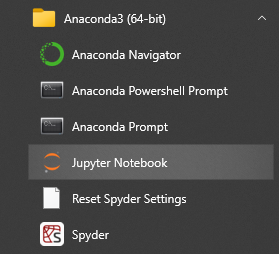


#### Оглавление это расширение (Table of contents) - тут придется поразбираться
Устанавливаем через терминал (Надо показать)
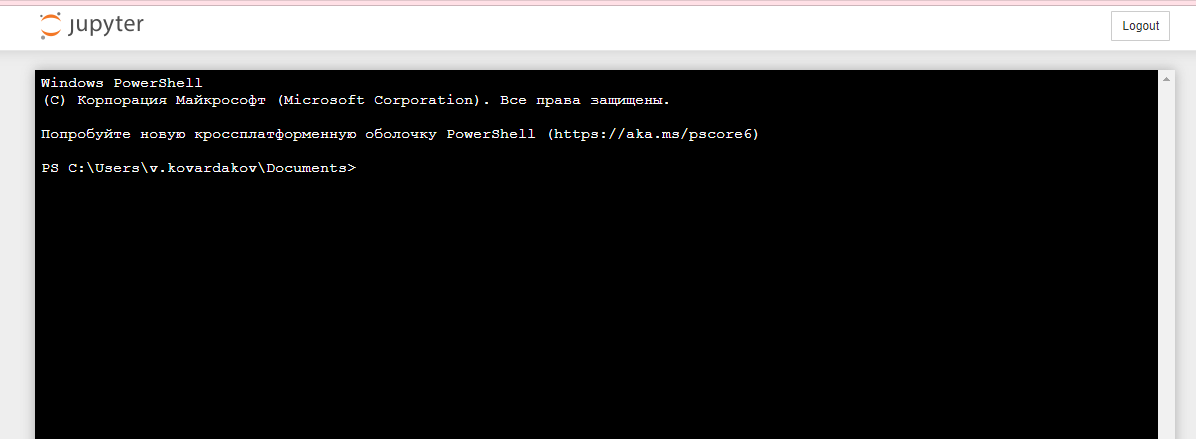
- Команды можно посмотреть здесь - https://github.com/Jupyter-contrib/jupyter_nbextensions_configurator

- Есть разные видео - https://www.youtube.com/watch?v=MYjP9yRFKZM

#### Ознакомтесь с возможностями, это очень крутые вещи, но иногда они плохо работают))

### import необходимых библиотек

In [1]:
import pandas as pd
import numpy as np

### Делаем Генератор

In [290]:
# Создадим рандомную переменную (генератор монетки)
np.random.binomial(1,0.5)

1

https://numpy.org/doc/stable/reference/random/generator.html

In [291]:
# Создадим генератор
result = []
for i in range(3):
    result.append(np.random.binomial(1,0.5))
    
result

[0, 0, 1]

In [121]:
# можно красивее (в питоне есть уже готовые генераторы)
[np.random.binomial(1,0.5) for _ in range(10)] # вместо i мы можем заменить на андерскор - урна))
# если не нужно дальше использовать переменную используем андерскор

[1, 1, 0, 0, 1, 0, 1, 1, 0, 1]

Что такое метод Монте-Карло - простыми словами, это когда мы проводим серию экспериментов и анализируем результат\
Наш результат это - распределение, но не будем забегать вперед

In [123]:
# попробуем сделать еще одним способом - с помощью pandas и метода sample
df = pd.DataFrame([0,1])
df

,0
0,0
1,1


In [305]:
df.sample(1)

,0
0,0


In [321]:
df.sample(1).values[0][0]

1

In [324]:
[df.sample(1).values[0][0] for _ in range(10)]

[1, 1, 1, 0, 0, 1, 1, 0, 1, 0]

In [325]:
# получили тоже самое
l = [df.sample(1).values[0][0] for _ in range(1000)]

In [328]:
sum(l)

497

Особо любопытным можно почитать про sample - работает ли он на основе Numpy и какое распределение в его основе заложено?\
ПРО ВИДЫ РАСПРЕДЕЛЕНИЯ ПОЗЖЕ

ПАУЗА ПАУЗА ПАУЗА ПАУЗА

#### Бросок монетки

In [192]:
# Сделаем код красивее, не хочется потом менять везде условия генератора, 
# а хочется поменять один раз

# Знакомимся с функциями в python
def monetka(): # На вход ничего не надо
    return [pd.DataFrame([0,1]).sample(1).values[0][0] for _ in range(10)]
monetka()

[0, 1, 0, 1, 1, 0, 1, 1, 1, 1]

In [239]:
# Как работает sample? 
# берет один элемент рандомно, потом выбирает рандомно еще один элемент из оставшихся
# Называется выборка без возвращения
pd.DataFrame([0,1]).sample(2) # видим что меняются местами

,0
1,1
0,0


In [245]:
# Создаем выборку с возвращением
pd.DataFrame([0,1]).sample(2, replace=True) # Давайте проверим и зарандомим одинаковые значения

,0
0,0
0,0


#### Шляпа и Бумажка
Пример выборки с возвращением\
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html
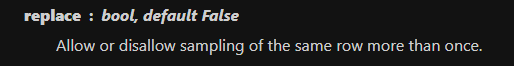

In [246]:
pd.Series([0,1]).sample(10, replace = True)

0    0
1    1
0    0
0    0
0    0
0    0
0    0
0    0
0    0
1    1
dtype: int64

### Генератор Кубик

In [247]:
pd.Series([1,2,3,4,5,6]).sample(10, replace = True) 
# Сделали 10 бросков

5    6
4    5
1    2
0    1
1    2
4    5
0    1
2    3
2    3
1    2
dtype: int64

In [248]:
# Хочется нормальный индекс
pd.Series([1,2,3,4,5,6]).sample(10, replace = True).reset_index()

,index,0
0,2,3
1,2,3
2,4,5
3,2,3
4,0,1
5,2,3
6,1,2
7,4,5
8,4,5
9,1,2


<Axes: >

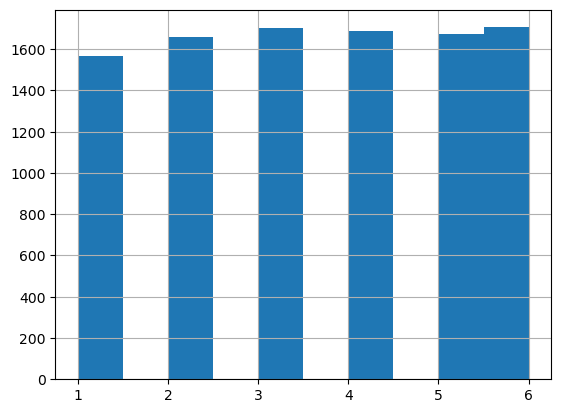

In [249]:
pd.Series([1,2,3,4,5,6]).sample(10000,replace=True).hist()

<Axes: >

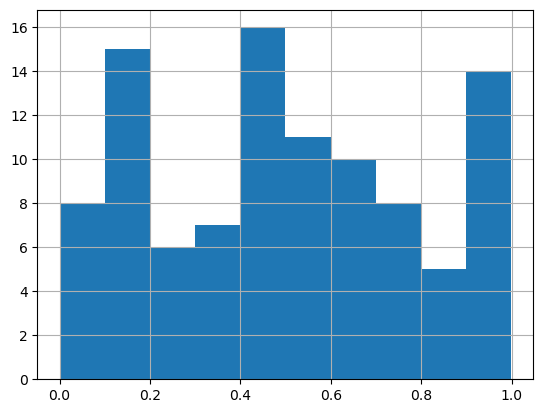

In [250]:
pd.Series(np.random.uniform(size=100)).hist()

<Axes: >

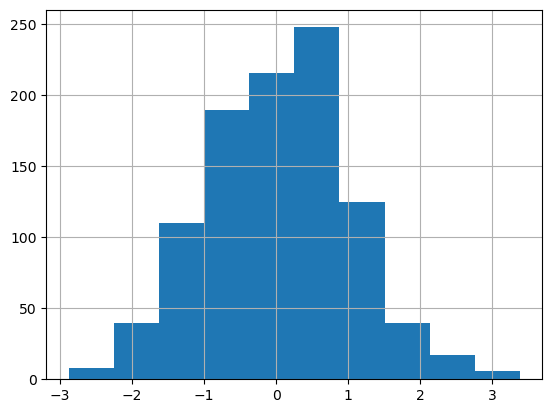

In [251]:
pd.Series(np.random.normal(size=1000)).hist()

<Axes: >

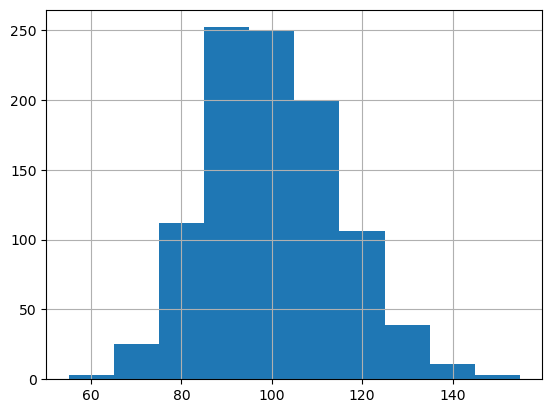

In [252]:
-- 
pd.Series(np.random.chisquare(100,size=1000)).hist()

<Axes: >

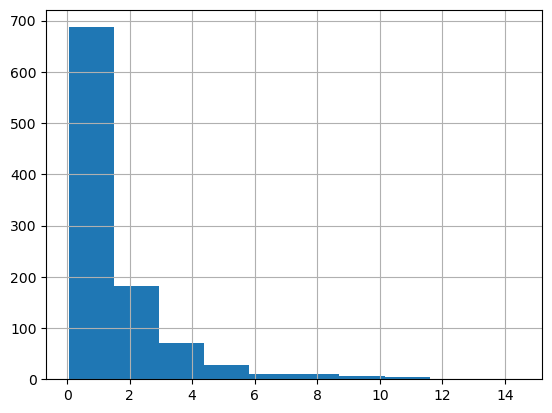

In [253]:
pd.Series(np.random.lognormal(size=1000)).hist()

<Axes: >

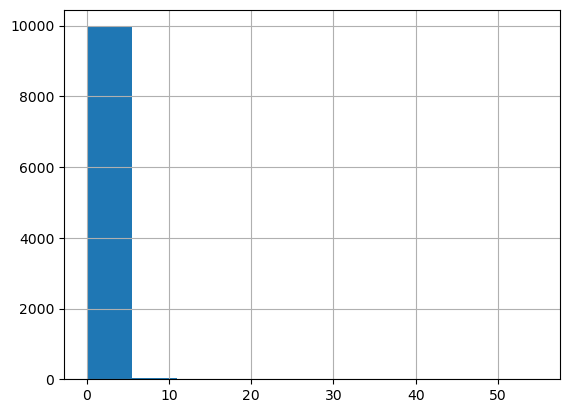

In [254]:
pd.Series(np.random.pareto(3,size=10000)).hist()

### Вода ведро источник

In [261]:
uniform = pd.Series(np.random.uniform(size=1000)) # 1000, 10000

<Axes: >

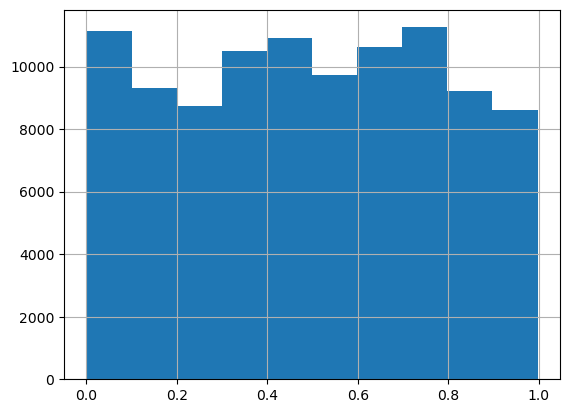

In [262]:
pd.Series(uniform.sample(100000,replace=True)).hist() # 100, 1000

### PDF и CDF

In [263]:
import seaborn as sns

In [264]:
u = np.random.randint(1,7,size=100000)

<Axes: ylabel='Probability'>

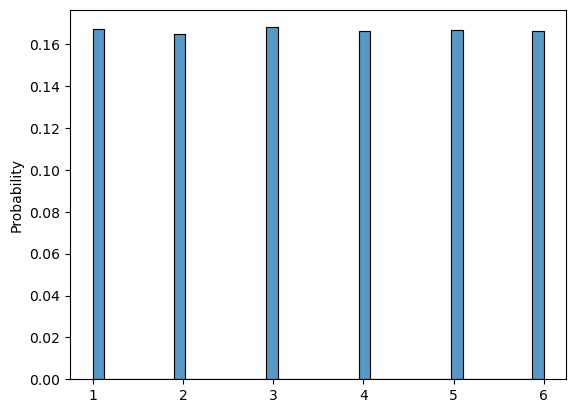

In [265]:
sns.histplot(u,stat='probability') # пропабилити дистрибьюшен (маз) фанкшн

CDF = cumulative math function

<Axes: ylabel='Proportion'>

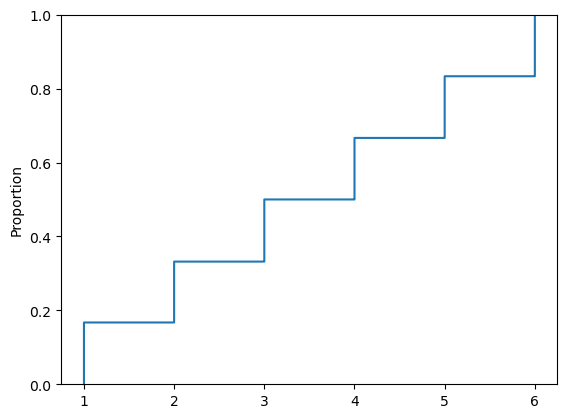

In [266]:
sns.ecdfplot(u)

<Axes: ylabel='Probability'>

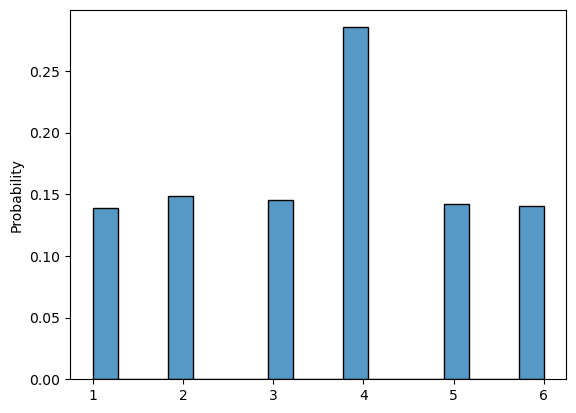

In [267]:
sns.histplot(pd.Series([1,2,3,4,4,5,6]).sample(10000,replace=True),stat='probability')

<Axes: ylabel='Proportion'>

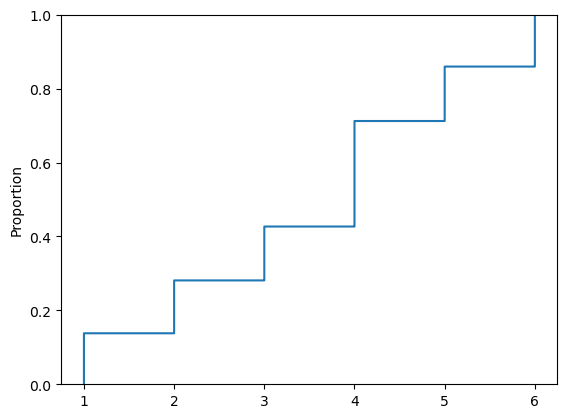

In [268]:
sns.ecdfplot(pd.Series([1,2,3,4,4,5,6]).sample(10000,replace=True))

<Axes: ylabel='Probability'>

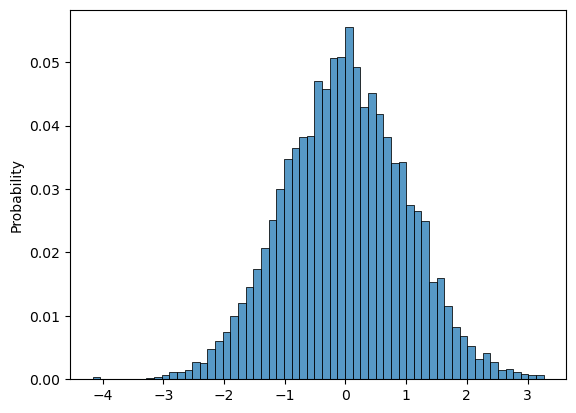

In [269]:
sns.histplot(np.random.normal(size=10000),stat='probability')

PDF - это вероятность получения одного значения непрерывной переменной\
CDF -  это вероятность получить значение ниже определенного значения X

<Axes: ylabel='Proportion'>

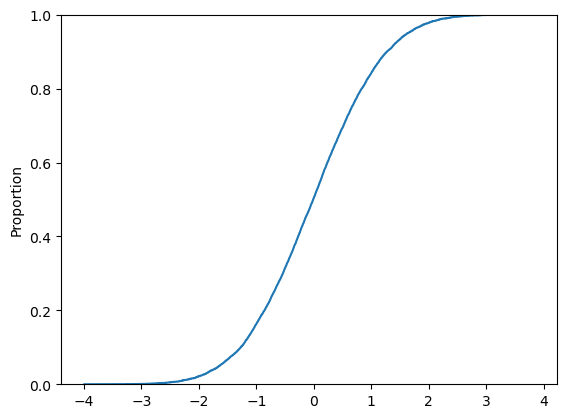

In [270]:
sns.ecdfplot(np.random.normal(size=10000))

### Как построить KDF plot
https://seaborn.pydata.org/generated/seaborn.kdeplot.html

<Axes: ylabel='Density'>

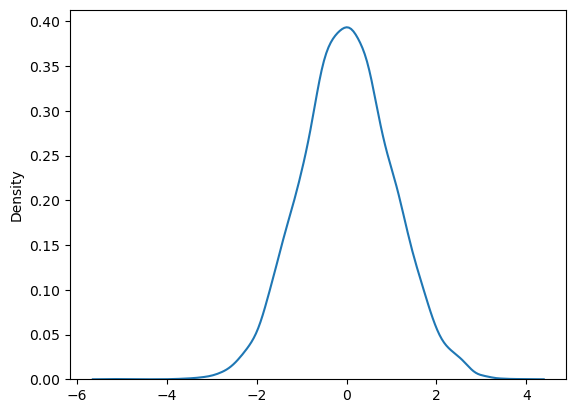

In [271]:
sns.kdeplot(np.random.normal(size=10000))

### КУ КУ график

In [272]:
measurements = np.random.uniform(size=10000)  

<Axes: ylabel='Count'>

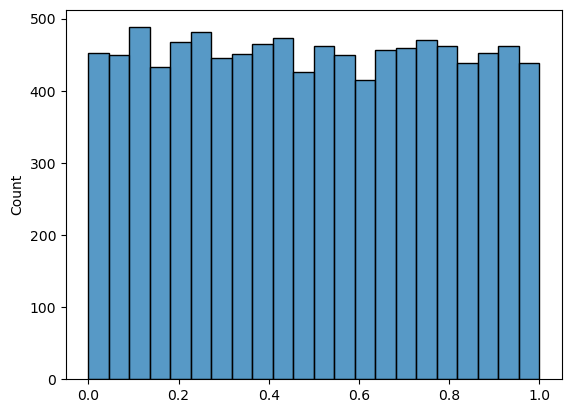

In [273]:
sns.histplot(measurements)

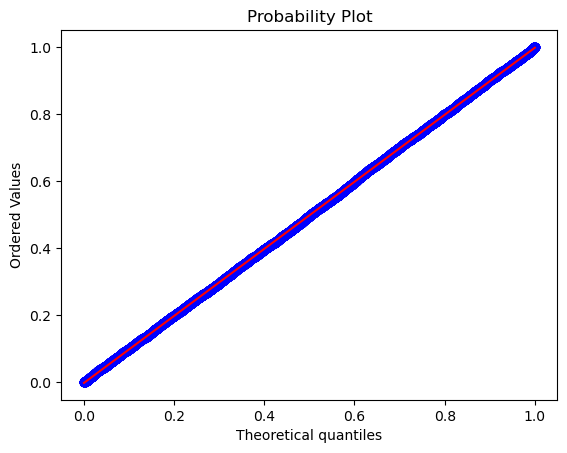

In [274]:
import numpy as np 
import pylab 
import scipy.stats as stats


stats.probplot(measurements, dist="uniform", plot=pylab)
pylab.show()

In [275]:
measurements = np.random.normal(size=10000)  

<Axes: ylabel='Count'>

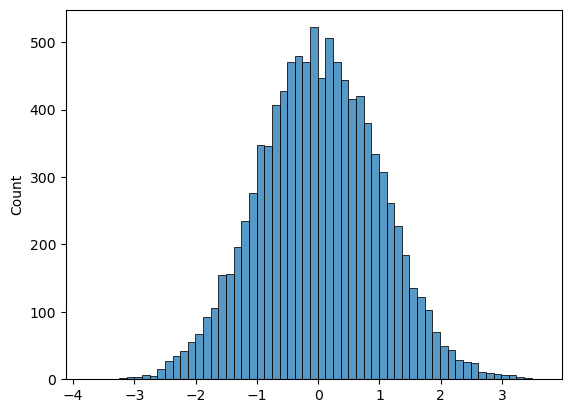

In [276]:
sns.histplot(measurements)

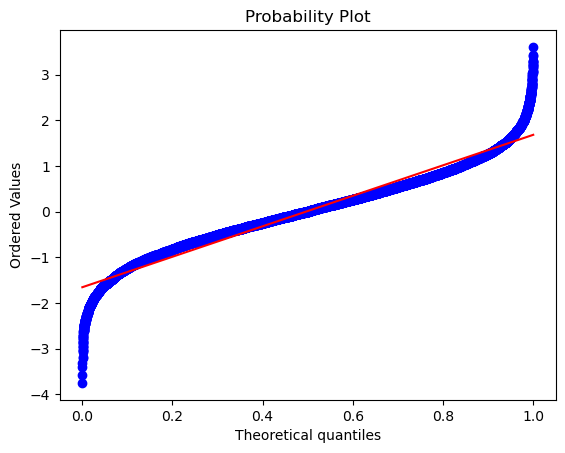

In [277]:
stats.probplot(measurements, dist="uniform", plot=pylab)
pylab.show()

### Теперь рассмотрим пример
В каком проценте случаев выпадет орел два раза подряд?

In [278]:
n = 10000 # 100, 1000
result = []
for _ in range(n):
    result.append(np.random.binomial(1,0.5,size=2).sum())

In [279]:
pd.Series(result).value_counts(normalize=True)

1    0.5010
0    0.2506
2    0.2484
dtype: float64

In [ ]:
sns.histplot(np.random.binomial(10,0.5,size=10000))